# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Nipune\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
Bitcoin_headlines = newsapi.get_everything(
    q="Bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin Libra: {Bitcoin_headlines['totalResults']}")

# Show sample article
Bitcoin_headlines["articles"][0]


Total articles about Bitcoin Libra: 7227


{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Elizabeth Lopatto',
 'title': 'Jack Dorsey defends Twitter’s Trump ban, then enthuses about bitcoin',
 'description': 'Twitter CEO Jack Dorsey, in a series of Tweets, explained that he felt banning US President Donald Trump’s account was the right move for the social network. “Offline harm as a result of online speech is demonstrably real, and what drives our policy and enfor…',
 'url': 'https://www.theverge.com/2021/1/13/22230028/jack-dorsey-donald-trump-twitter-ban-moderation-bitcoin-thread',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/2pWrvN_qQZ7qWG0HEMBnYO0n8ks=/0x10:3323x1750/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22234226/1229659186.jpg',
 'publishedAt': '2021-01-14T00:57:27Z',
 'content': 'Ban reflects Twitters failure to promote healthy conversation\r\nPhoto by Hannah McKay-Pool/Getty Images\r\nTwitter CEO Jack Dorsey, in a series of Tweets, explained that he felt banning US President Don… [

In [5]:
# Fetch the Ethereum news articles
Ethereum_headlines = newsapi.get_everything(
    q="Ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum Libra: {Ethereum_headlines['totalResults']}")

# Show sample article
Ethereum_headlines["articles"][0]

Total articles about Ethereum Libra: 1592


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Lucas Matney',
 'title': 'Coinbase is going public via direct listing',
 'description': 'Coinbase plans to go public by way of a direct listing, the company announced in a blog post today. The cryptocurrency exchange was founded in 2012 and allows users to buy and trade decentralized tokens like bitcoin and ethereum. The company has raised over $…',
 'url': 'http://techcrunch.com/2021/01/28/coinbase-is-going-public-via-direct-listing/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/01/coinbase.jpg?w=750',
 'publishedAt': '2021-01-28T19:36:35Z',
 'content': 'Coinbase plans to go public by way of a direct listing, the company announced in a blog post today.\r\nThe cryptocurrency exchange was founded in 2012 and allows users to buy and trade decentralized to… [+1258 chars]'}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
Bitcoin_sentiments = []

for article in Bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Bitcoin_df = pd.DataFrame(Bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Bitcoin_df = Bitcoin_df[cols]

Bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2021-01-14,Ban reflects Twitters failure to promote healt...,-0.3818,0.135,0.176,0.689
1,2021-01-18,"When Mt. Gox went bankrupt in 2014, it was the...",-0.5574,0.000,0.096,0.904
2,2021-01-14,Cryptocurrency exchange company Gemini is acqu...,0.6249,0.150,0.000,0.850
3,2021-01-28,TL;DR: The Bitcoin and Cryptocurrency Mastery ...,0.0000,0.000,0.000,1.000
4,2021-01-29,"As the man himself said, it was inevitable. \r...",-0.5037,0.000,0.114,0.886


In [7]:
# Create the Ethereum sentiment scores DataFrame
Ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        Ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
Ethereum_df = pd.DataFrame(Ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
Ethereum_df = Ethereum_df[cols]

Ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2021-01-28,Coinbase plans to go public by way of a direct...,0.0000,0.000,0.0,1.000
1,2021-02-04,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2021-02-03,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.0,1.000
3,2021-02-04,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
4,2021-01-05,Cryptocurrencies stole headlines on the first ...,0.3412,0.074,0.0,0.926


In [8]:
# Describe the Bitcoin Sentiment
Bitcoin_df.describe()

,compound,positive,negative,neutral
count,94.000000,94.000000,94.000000,94.000000
mean,0.052950,0.036500,0.022309,0.941202
std,0.326811,0.063632,0.046014,0.080747
min,-0.844200,0.000000,0.000000,0.647000
25%,0.000000,0.000000,0.000000,0.903250
50%,0.000000,0.000000,0.000000,1.000000
75%,0.226300,0.060000,0.000000,1.000000
max,0.921700,0.353000,0.227000,1.000000


In [9]:
# Describe the Ethereum Sentiment
Ethereum_df.describe()

,compound,positive,negative,neutral
count,94.000000,94.000000,94.000000,94.000000
mean,0.126060,0.058064,0.024606,0.917340
std,0.353169,0.074245,0.049754,0.090794
min,-0.812600,0.000000,0.000000,0.687000
25%,0.000000,0.000000,0.000000,0.875000
50%,0.000000,0.036000,0.000000,0.933000
75%,0.361200,0.100500,0.038500,1.000000
max,0.900100,0.313000,0.208000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum has the highest mean positive score with 0.055614

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score

Q. Which coin had the highest positive score?

A: Ethereum has the highest postive score 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re


In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stopWords = set(stopwords.words('english'))
text = article
# Expand the default stopwords list if necessary
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [12]:
# Complete the tokenizer function

    # Remove the punctuation from text
    # Create a tokenized list of the words
    # Lemmatize words into root words
    # Convert the words to lowercase
    # Remove the stop words
    
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [13]:
Bitcoin_df.text.apply(tokenizer)

0     [ban, reflects, twitters, failure, promote, he...
1     [mt, gox, went, bankrupt, wa, world, largest, ...
2     [cryptocurrency, exchange, company, gemini, ac...
3     [tldr, bitcoin, cryptocurrency, mastery, bundl...
4     [man, said, wa, inevitableon, friday, tesla, c...
                            ...                        
89    [cryptocurrencies, may, see, boost, china, us,...
90    [market, capitalization, value, cryptocurrency...
91    [reuters, stafffile, photo, representations, v...
92    [reuters, stafffile, photo, representations, v...
93    [january, min, readthis, story, originally, ap...
Name: text, Length: 94, dtype: object

In [14]:
Ethereum_df.text.apply(tokenizer)

0     [coinbase, plan, go, public, way, direct, list...
1     [file, photo, representation, ethereum, virtua...
2     [reuters, stafffile, photo, representation, et...
3     [file, photo, representation, ethereum, virtua...
4     [cryptocurrencies, stole, headline, first, sto...
                            ...                        
89    [lets, talk, portfolio, defense, last, week, s...
90    [happenedshares, several, company, deep, tie, ...
91    [number, people, asking, think, game, stop, si...
92    [gettybitcoins, recent, high, wa, write, fall,...
93    [intrinsic, value, etherthis, question, ive, w...
Name: text, Length: 94, dtype: object

In [15]:
# Create a new tokens column for Bitcoin
Bitcoin_df["bitcoincolumn"] = Bitcoin_df.text.apply(tokenizer)
tokens = []
for x in Bitcoin_df['bitcoincolumn'].values:
    tokens.extend(x)

Bitcoin_df.head()

,date,text,compound,positive,negative,neutral,bitcoincolumn
0,2021-01-14,Ban reflects Twitters failure to promote healt...,-0.3818,0.135,0.176,0.689,"[ban, reflects, twitters, failure, promote, he..."
1,2021-01-18,"When Mt. Gox went bankrupt in 2014, it was the...",-0.5574,0.000,0.096,0.904,"[mt, gox, went, bankrupt, wa, world, largest, ..."
2,2021-01-14,Cryptocurrency exchange company Gemini is acqu...,0.6249,0.150,0.000,0.850,"[cryptocurrency, exchange, company, gemini, ac..."
3,2021-01-28,TL;DR: The Bitcoin and Cryptocurrency Mastery ...,0.0000,0.000,0.000,1.000,"[tldr, bitcoin, cryptocurrency, mastery, bundl..."
4,2021-01-29,"As the man himself said, it was inevitable. \r...",-0.5037,0.000,0.114,0.886,"[man, said, wa, inevitableon, friday, tesla, c..."


In [16]:
# Create a new tokens column for Ethereum
Ethereum_df["Ethereumcolumn"] = Ethereum_df.text.apply(tokenizer)
tokens = []
for x in Ethereum_df['Ethereumcolumn'].values:
    tokens.extend(x)

Ethereum_df.head()

,date,text,compound,positive,negative,neutral,Ethereumcolumn
0,2021-01-28,Coinbase plans to go public by way of a direct...,0.0000,0.000,0.0,1.000,"[coinbase, plan, go, public, way, direct, list..."
1,2021-02-04,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
2,2021-02-03,By Reuters Staff\r\nFILE PHOTO: Representation...,0.0000,0.000,0.0,1.000,"[reuters, stafffile, photo, representation, et..."
3,2021-02-04,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000,"[file, photo, representation, ethereum, virtua..."
4,2021-01-05,Cryptocurrencies stole headlines on the first ...,0.3412,0.074,0.0,0.926,"[cryptocurrencies, stole, headline, first, sto..."


### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
bigram_counts = Counter(ngrams(Bitcoin_df, n=2))
print(dict(bigram_counts))

{('date', 'text'): 1, ('text', 'compound'): 1, ('compound', 'positive'): 1, ('positive', 'negative'): 1, ('negative', 'neutral'): 1, ('neutral', 'bitcoincolumn'): 1}


In [19]:
# Generate the Ethereum N-grams where N=2
bigram_counts = Counter(ngrams(Ethereum_df, n=2))
print(dict(bigram_counts))

{('date', 'text'): 1, ('text', 'compound'): 1, ('compound', 'positive'): 1, ('positive', 'negative'): 1, ('negative', 'neutral'): 1, ('neutral', 'Ethereumcolumn'): 1}


In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [38]:
# Use token_count to get the top 10 words for Bitcoin
token_count(tokens, 10)

[('char', 92),
 ('bitcoin', 42),
 ('ethereum', 28),
 ('cryptocurrency', 26),
 ('reuters', 25),
 ('currency', 21),
 ('photo', 20),
 ('virtual', 19),
 ('ha', 19),
 ('taken', 18)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

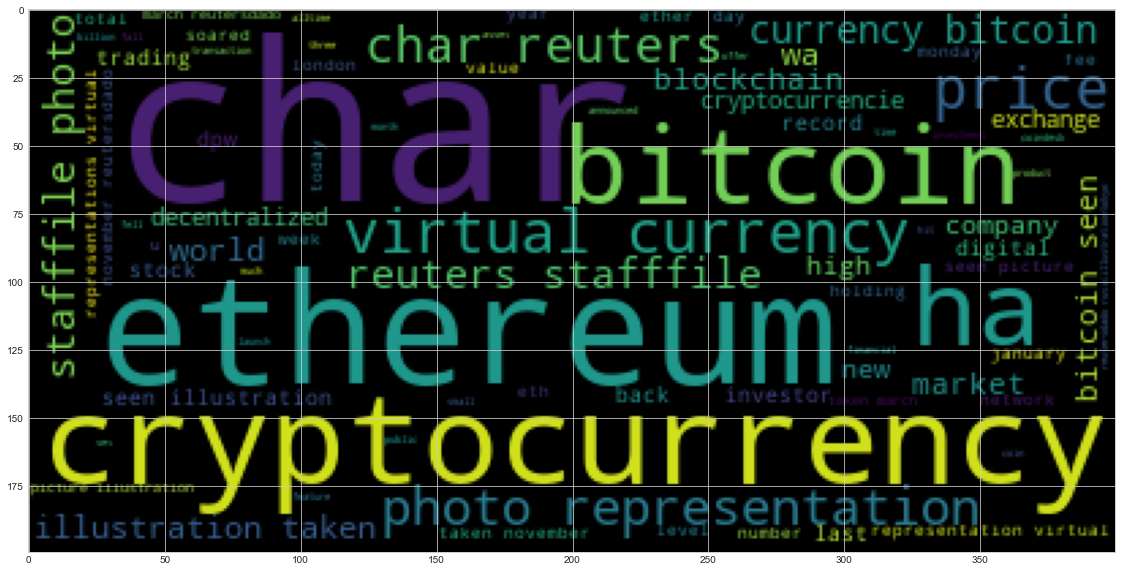

In [24]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(' '.join(tokens))
plt.imshow(wc)

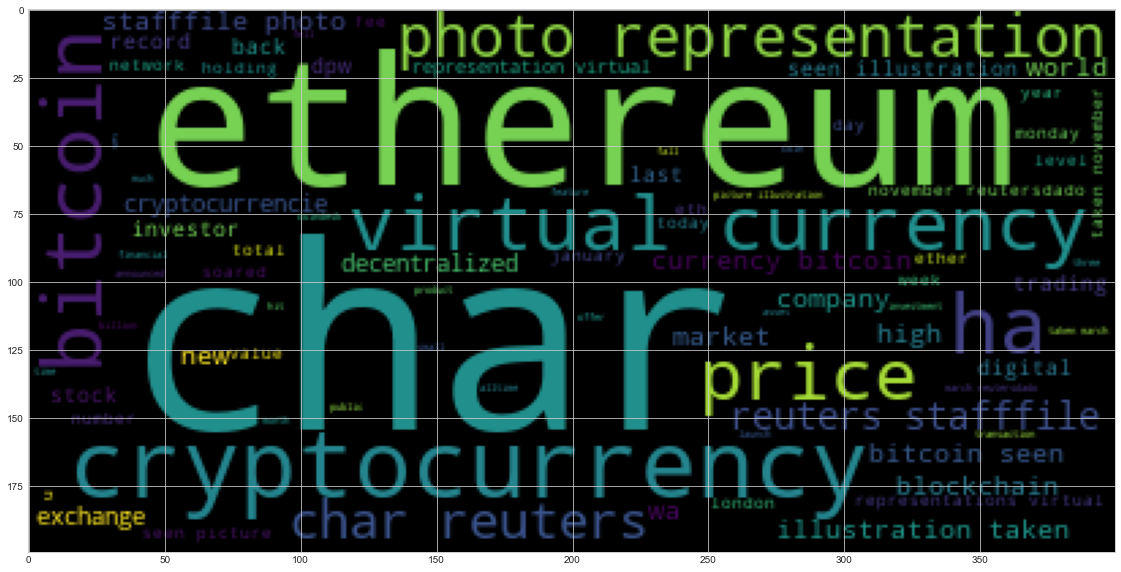

In [25]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(' '.join(tokens))
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [39]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [40]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [43]:
# Concatenate all of the Bitcoin text together
bitcoin_text_all = ''

for index, row in Bitcoin_df.iterrows():
    bitcoin_text_all += row['text']

    bitcoin_text_all

In [44]:
# Run the NER processor on all of the text
bitcoin_doc = nlp(bitcoin_text_all)

# Add a title to the document
bitcoin_doc.user_data['title'] = 'est'

In [45]:
# Render the visualization
displacy.render(bitcoin_doc, style='ent')

In [49]:
# List all Entities
print([ent.text for ent in bitcoin_doc.ents])

['Twitters', 'Hannah McKay-Pool/Getty', 'Twitter', 'Jack Dorsey', 'Tweets', 'US', 'Don', 'Mt. Gox', '2014', 'Bitcoin', '850,000', 'Bitcoins', 'thousands', 'Gemini', 'Blockrize', 'today', 'Blockrizes', 'Later this year', 'Bitcoin', '21.11', 'Jan. 28', '70%', 'Bitcoin', 'Friday,', 'Tesla', 'Elon Musk', 'Twitter', 'Musk', 'Joe Bidens', 'the U.S. Treasury Department', 'Michael S. Barr', 'bitcoin', 'the popular cryptocurrency exchange', 'today', '2012', 'bitcoin', 'digital', 'over millions', 'chars]The Square', 'Alex Castro', 'The Verge', 'Jack Dorsey', 'Twitter and Square', 'Reuters', 'LONDON', 'Jan 4', 'Reuters', 'Bitcoin', '14%', '27,805', 'Monday', 'the new year', 'Bitcoin', '33,365', 'Asia', 'Monday', '34,800', 'Sunday', 'Bitcoin', '33,365', 'Asia', 'Monday', '34,800', 'Sunday', 'Reuters', 'Bitcoin', 'March 13, 2020', 'Dado Ruvic', 'NEW YORK', 'Reuters', 'Bitcoin', 'Twitter', 'Musk', 'chars]At least 22', 'pro-Trump', 'roughly $520,000', 'bitcoin', 'a month', 'U.S.', '202', '10%', 'LOND

---

### Ethereum NER

In [50]:
# Concatenate all of the Ethereum text together
Ethereum_text_all = ''

for index, row in Ethereum_df.iterrows():
    Ethereum_text_all += row['text']

    Ethereum_text_all

In [51]:
# Run the NER processor on all of the text
Ethereum_doc = nlp(bitcoin_text_all)

# Add a title to the document
Ethereum_doc.user_data['title'] = 'est'

In [52]:
# Render the visualization
displacy.render(Ethereum_doc, style='ent')

In [53]:
# List all Entities
print([ent.text for ent in Ethereum_doc.ents])

['Twitters', 'Hannah McKay-Pool/Getty', 'Twitter', 'Jack Dorsey', 'Tweets', 'US', 'Don', 'Mt. Gox', '2014', 'Bitcoin', '850,000', 'Bitcoins', 'thousands', 'Gemini', 'Blockrize', 'today', 'Blockrizes', 'Later this year', 'Bitcoin', '21.11', 'Jan. 28', '70%', 'Bitcoin', 'Friday,', 'Tesla', 'Elon Musk', 'Twitter', 'Musk', 'Joe Bidens', 'the U.S. Treasury Department', 'Michael S. Barr', 'bitcoin', 'the popular cryptocurrency exchange', 'today', '2012', 'bitcoin', 'digital', 'over millions', 'chars]The Square', 'Alex Castro', 'The Verge', 'Jack Dorsey', 'Twitter and Square', 'Reuters', 'LONDON', 'Jan 4', 'Reuters', 'Bitcoin', '14%', '27,805', 'Monday', 'the new year', 'Bitcoin', '33,365', 'Asia', 'Monday', '34,800', 'Sunday', 'Bitcoin', '33,365', 'Asia', 'Monday', '34,800', 'Sunday', 'Reuters', 'Bitcoin', 'March 13, 2020', 'Dado Ruvic', 'NEW YORK', 'Reuters', 'Bitcoin', 'Twitter', 'Musk', 'chars]At least 22', 'pro-Trump', 'roughly $520,000', 'bitcoin', 'a month', 'U.S.', '202', '10%', 'LOND

---